# Student Habits vs Academic Performance
This notebook explores the relationship between student habits and exam performance using regression models.

In [24]:
#1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
import io
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [26]:
#3. Initial Data Info
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [27]:
#4. Clean Data
#Drop ID column
if 'student_id' in df.columns:
    df.drop('student_id', axis=1, inplace=True)
#impute n/a parent education with Unknown
df.fillna({'parental_education_level': 'Unknown'}, inplace=True)
#Check for missing values
print(df.isnull().sum())

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64


In [28]:
#5. Encode Categorical Variables
categorical = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)
df_encoded.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,diet_quality_Good,diet_quality_Poor,parental_education_level_High School,parental_education_level_Master,parental_education_level_Unknown,internet_quality_Good,internet_quality_Poor,extracurricular_participation_Yes
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2,False,False,False,False,False,False,True,False,False,False,True
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0,False,False,False,True,False,True,False,False,False,False,False
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3,True,False,False,False,True,True,False,False,False,True,False
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8,False,False,False,False,True,False,True,False,True,False,True
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4,False,False,False,False,False,False,True,False,True,False,False


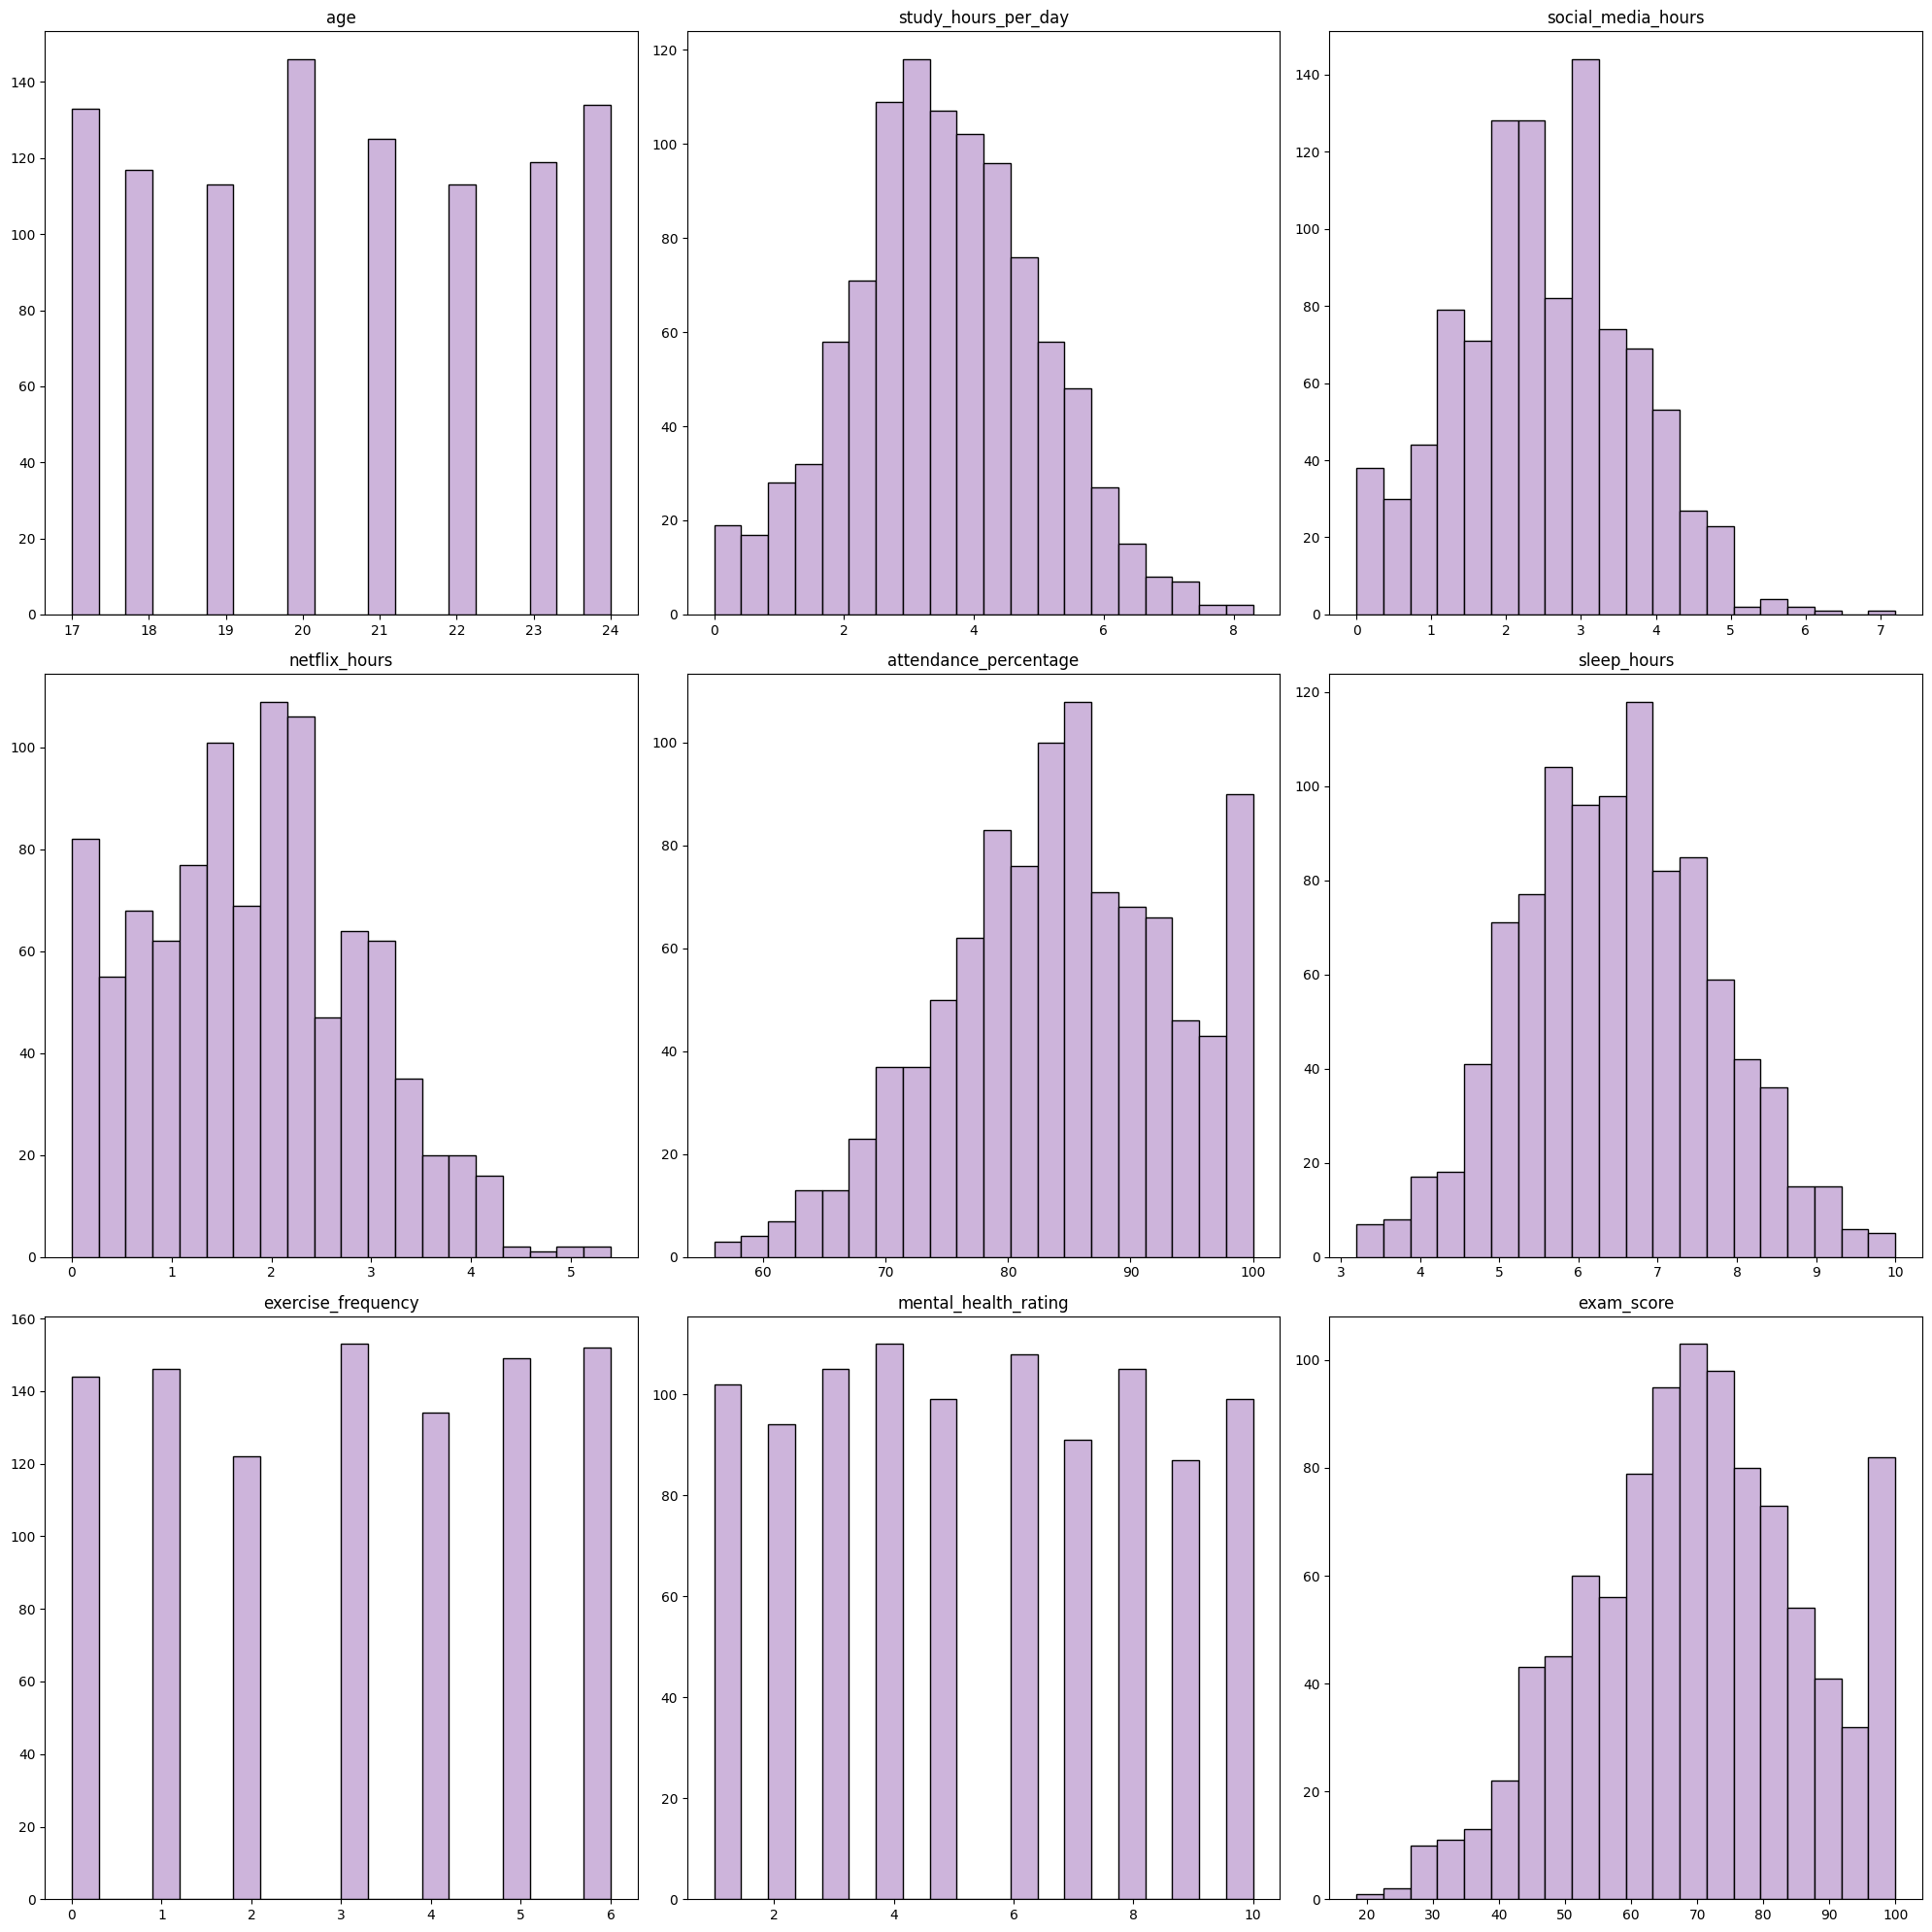

In [29]:
# 6. Visualize Distributions (Original Numeric Features Only)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots with custom bar color and no gridlines
ax_array = df[numeric_cols].hist(
    bins=20,
    figsize=(20, 20),
    edgecolor='black',
    color='#cdb4db'  # light purple
)

# Turn off grid for each subplot
for ax in ax_array.flatten():
    ax.grid(False)

plt.tight_layout()
plt.show()

<ipython-input-30-52d0383aaac2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
<ipython-input-30-52d0383aaac2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
<ipython-input-30-52d0383aaac2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
<ipython-input-30-52d0383aaac2>:9: FutureWarning: 

Passing `palette` without assigning `hue` 

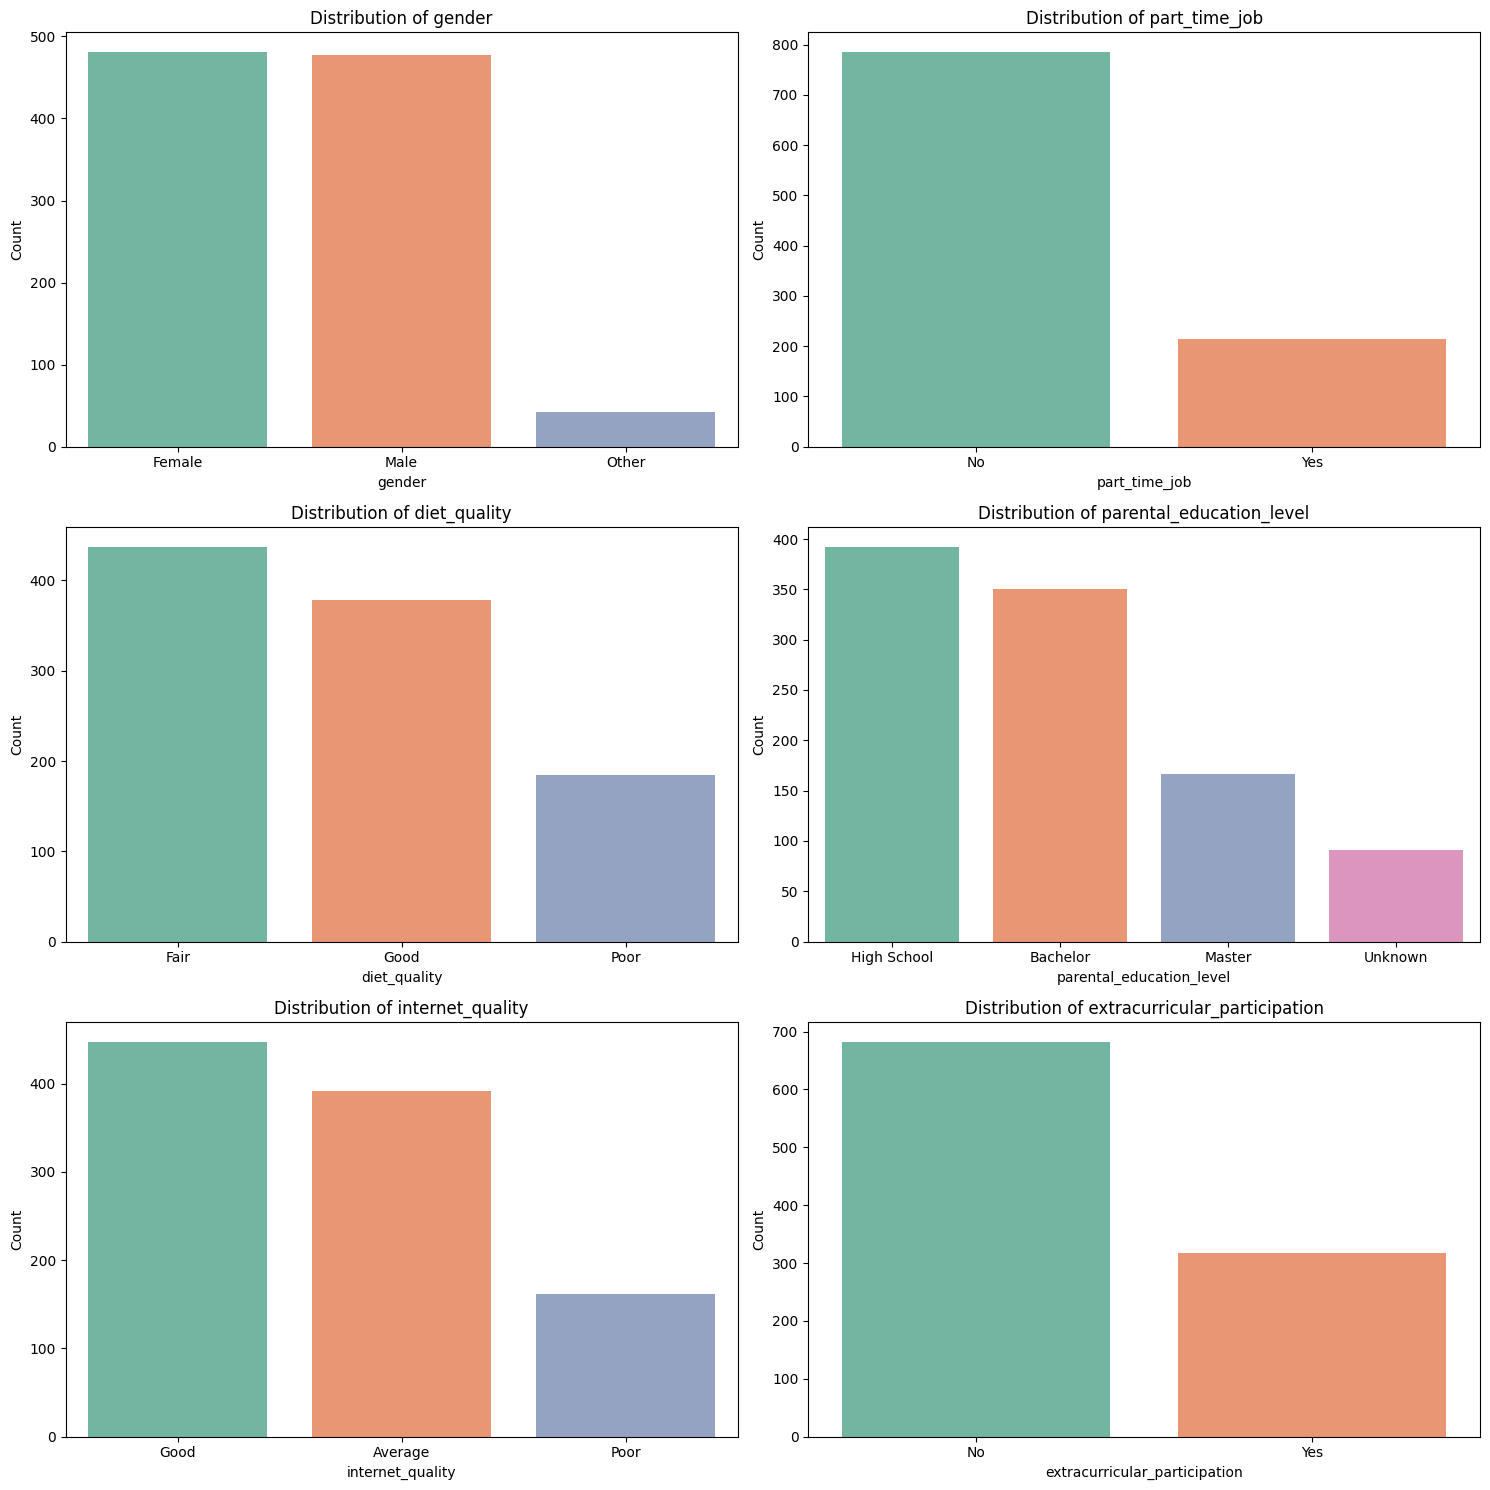

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


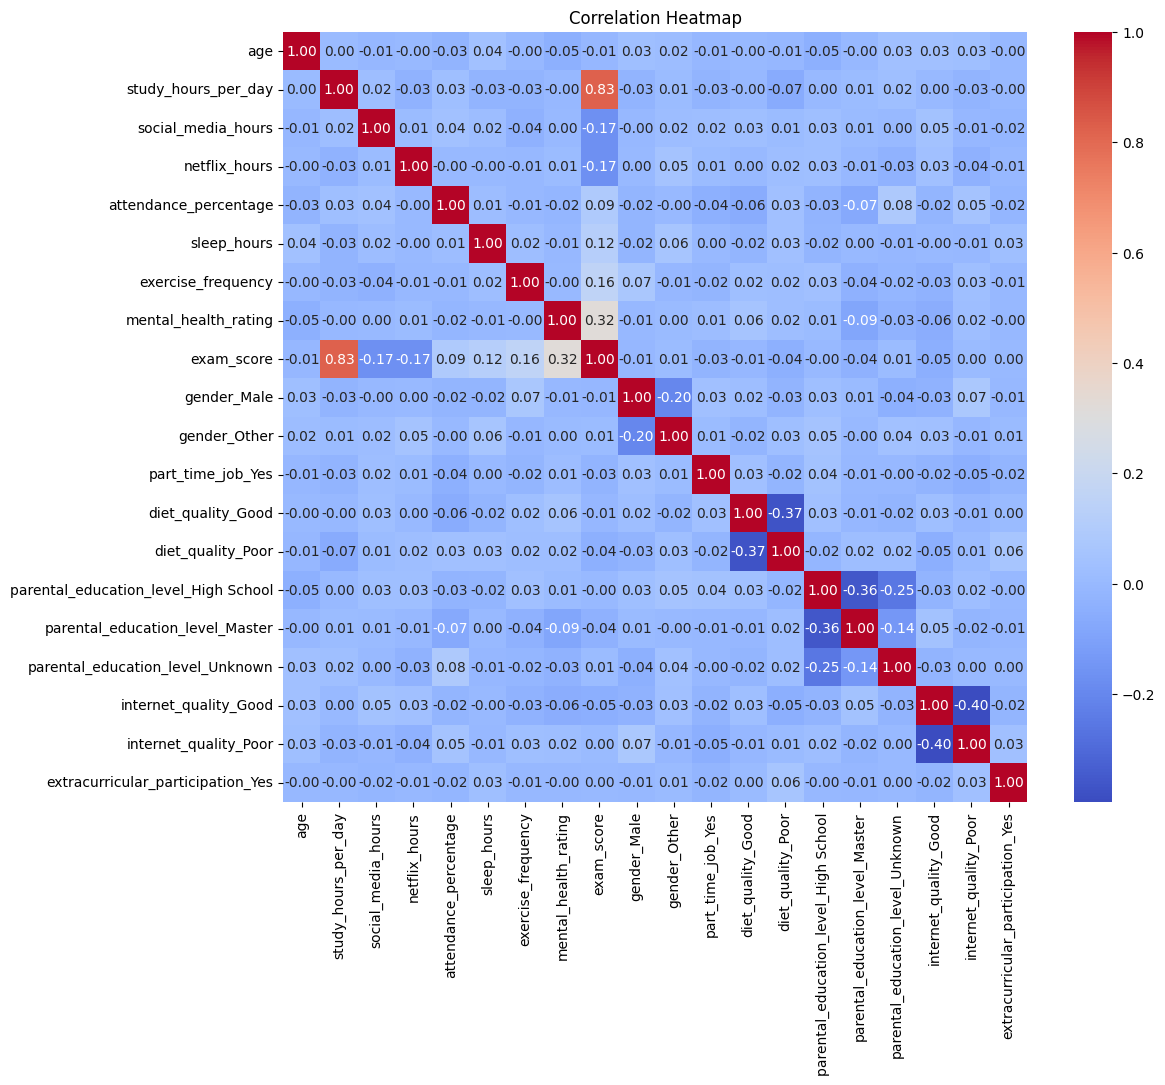

In [31]:
#7. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
#Train/Test Split
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('exam_score', axis=1)
y = df_encoded['exam_score']

# Perform the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (800, 19)
X_test: (200, 19)
y_train: (800,)
y_test: (200,)


In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Polynomial (deg=2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "SVR (Linear Kernel)": make_pipeline(StandardScaler(), SVR(kernel='linear', C=10, epsilon=0.1)),
    "SVR (Poly Kernel)": make_pipeline(StandardScaler(), SVR(kernel='poly', degree=2, C=10, epsilon=0.1)),
    "SVR (RBF)": make_pipeline(StandardScaler(), SVR(kernel='rbf', C=10, epsilon=0.1)),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

results = []

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_mse = -np.mean(cv_scores)
    cv_std = np.std(cv_scores)

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Test error stats
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    abs_errors = np.abs(y_pred - y_test)
    q25, q50, q75 = np.percentile(abs_errors, [25, 50, 75])

    results.append({
        "Model": name,
        "CV_MSE": round(cv_mse, 3),
        "CV_Std": round(cv_std, 3),
        "Test_RMSE": round(rmse, 3),
        "Test_MSE": round(mse, 3),
        "MAE": round(mae, 3),
        "Q25 Error": round(q25, 3),
        "Q50 Error": round(q50, 3),
        "Q75 Error": round(q75, 3)
    })

results_df = pd.DataFrame(results).sort_values(by="Test_RMSE")
display(results_df)

,Model,CV_MSE,CV_Std,Test_RMSE,Test_MSE,MAE,Q25 Error,Q50 Error,Q75 Error
2,Lasso,30.018,4.771,5.136,26.374,4.178,1.817,3.717,6.342
1,Ridge,30.065,4.777,5.145,26.470,4.188,1.866,3.621,6.303
0,Linear,30.073,4.778,5.146,26.476,4.189,1.851,3.623,6.288
4,SVR (Linear Kernel),31.177,5.122,5.219,27.240,4.243,1.684,3.820,6.244
3,Polynomial (deg=2),40.871,3.390,5.336,28.475,4.299,1.656,3.720,6.347
6,SVR (RBF),42.742,4.164,5.992,35.902,4.840,2.008,4.534,6.903
7,Random Forest,43.747,8.254,6.223,38.720,4.940,1.712,4.018,7.315
8,KNN,121.169,15.754,11.207,125.604,8.868,3.250,8.020,12.550
5,SVR (Poly Kernel),357.763,58.463,17.877,319.583,13.535,4.212,10.031,21.525


<ipython-input-35-b63ef793d325>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


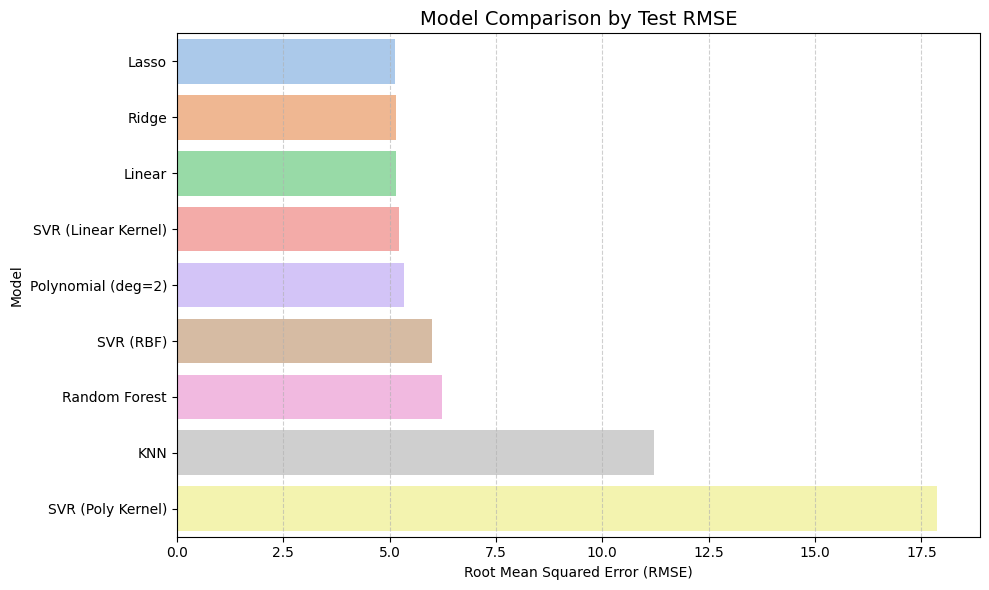

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

In [35]:
# Sort models by RMSE
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df.sort_values("Test_RMSE"),
    x="Test_RMSE", y="Model", palette="pastel"
)
plt.title("Model Comparison by Test RMSE", fontsize=14)
plt.xlabel("Root Mean Squared Error (RMSE)")
plt.ylabel("Model")
plt.xlim(0, results_df["Test_RMSE"].max() + 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 6))

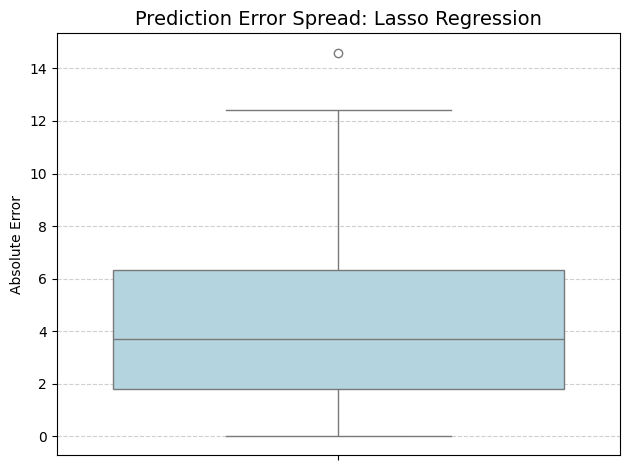

In [36]:
# Predict again with the best model
best_model_name = results_df.sort_values(by="Test_RMSE").iloc[0]["Model"]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
abs_errors_best = np.abs(y_pred_best - y_test)
sns.boxplot(y=abs_errors_best, color="lightblue")
plt.title("Prediction Error Spread: Lasso Regression", fontsize=14)
plt.ylabel("Absolute Error")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-37-1c0c666c72bb>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


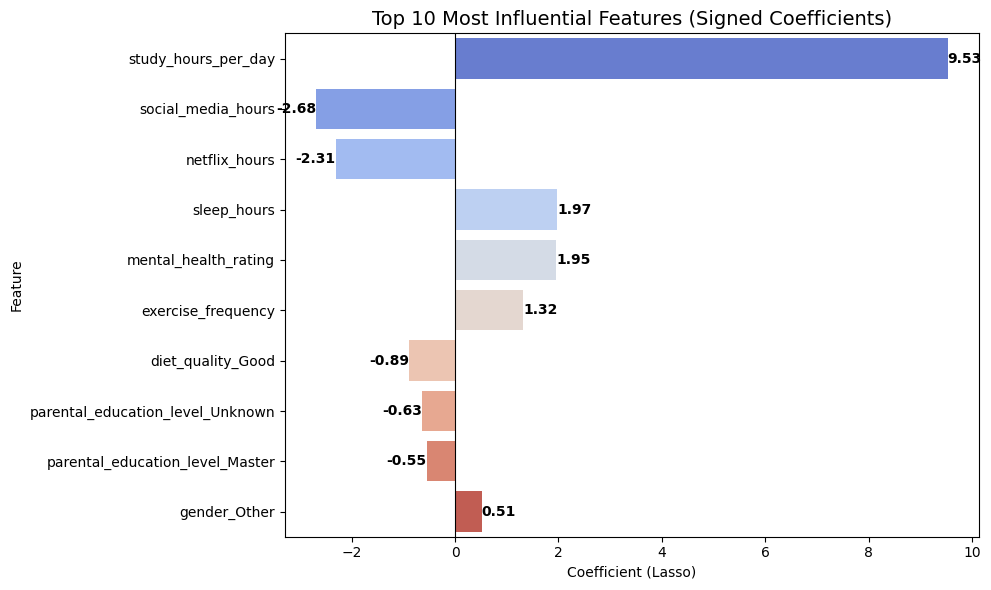

In [37]:
# Import necessary packages
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Refit Lasso model (if not already fit)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Get feature importances
lasso_coef = lasso.coef_
feature_names = X_train.columns

# Create DataFrame with signed and absolute values
importance_signed_df = (
    pd.DataFrame({
        "Feature": feature_names,
        "Coefficient": lasso_coef
    })
    .assign(Abs_Coefficient=lambda d: d["Coefficient"].abs())
    .sort_values(by="Abs_Coefficient", ascending=False)
    .head(10)
)

# Plot with diverging colors and annotations
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=importance_signed_df,
    x="Coefficient", y="Feature",
    palette="coolwarm"
)

# Add annotations
for i, (index, row) in enumerate(importance_signed_df.iterrows()):
    ax.text(
        x=row["Coefficient"],
        y=i,
        s=f'{row["Coefficient"]:.2f}',
        color="black",
        ha="left" if row["Coefficient"] > 0 else "right",
        va="center",
        fontweight="bold"
    )

# Final styling
plt.title("Top 10 Most Influential Features (Signed Coefficients)", fontsize=14)
plt.xlabel("Coefficient (Lasso)")
plt.ylabel("Feature")
plt.axvline(0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()


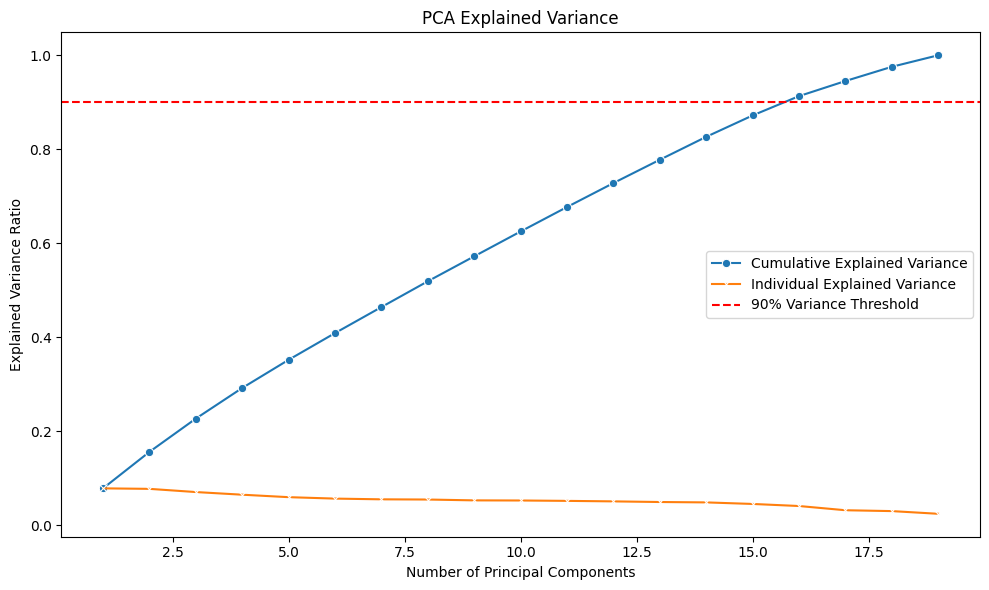

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, len(cumulative_variance) + 1), y=cumulative_variance, marker='o', label='Cumulative Explained Variance')
sns.lineplot(x=range(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio, marker='x', label='Individual Explained Variance')

# Add threshold line
plt.axhline(0.90, color='red', linestyle='--', label='90% Variance Threshold')
plt.title('PCA Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.tight_layout()
plt.show()


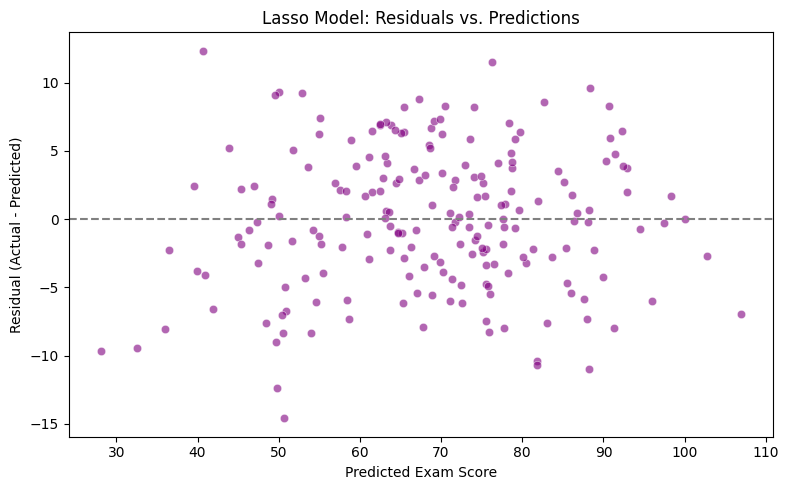

In [39]:
lasso_predictions = lasso.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - lasso_predictions

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=lasso_predictions, y=residuals, color="purple", alpha=0.6)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Lasso Model: Residuals vs. Predictions")
plt.tight_layout()
plt.savefig("lasso_residuals.png")
plt.show()


In [40]:
import pandas as pd

# Reset index to ensure alignment
y_test_reset = y_test.reset_index(drop=True)
X_test_reset = X_test.reset_index(drop=True)

# Create predictions and residuals
residuals = abs(y_test_reset - lasso_predictions)

# Combine into a DataFrame
top_error_df = pd.DataFrame({
    "Actual Score": y_test_reset,
    "Predicted Score": lasso_predictions,
    "Absolute Error": residuals
})

# Add back in key features from X_test
selected_features = ["study_hours_per_day", "netflix_hours", "social_media_hours", "sleep_hours", "attendance_percentage"]
top_error_df = pd.concat([top_error_df, X_test_reset[selected_features]], axis=1)

# Get top 10 errors
top_error_df = top_error_df.sort_values(by="Absolute Error", ascending=False).head(10)
top_error_df.reset_index(drop=True, inplace=True)
top_error_df


,Actual Score,Predicted Score,Absolute Error,study_hours_per_day,netflix_hours,social_media_hours,sleep_hours,attendance_percentage
0,36.0,50.604880,14.604880,0.8,3.8,1.4,7.5,76.5
1,37.4,49.810602,12.410602,1.7,3.2,1.2,5.8,76.9
2,53.0,40.647658,12.352342,0.0,0.6,2.4,7.1,87.0
3,87.8,76.283262,11.516738,4.6,2.4,2.4,6.9,75.2
4,77.3,88.270378,10.970378,5.5,1.8,3.2,7.5,100.0
5,71.1,81.801786,10.701786,4.5,0.4,1.7,7.8,86.1
6,71.4,81.831476,10.431476,5.9,0.4,3.5,4.9,89.0
7,18.4,28.059066,9.659066,0.6,3.0,3.1,5.2,79.9
8,98.0,88.378165,9.621835,5.0,2.3,4.5,7.7,87.2
9,23.1,32.522990,9.422990,0.9,2.5,2.4,6.9,89.2
